# 딥러닝(LSTM)을 활용하여 삼성전자 주가 예측
### 참고 사이트 : https://teddylee777.github.io/tensorflow/LSTM%EC%9C%BC%EB%A1%9C-%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EB%8A%94-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
# 삼성전자 주가 다운로드 사이트
# https://finance.yahoo.com/quote/005930.KS?p=005930.KS&.tsrc=fin-srch

In [3]:
df_price = pd.read_csv('005930_2.KS.csv', encoding='utf8')

In [4]:
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,0.090599,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,0.082740,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,0.083333,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,0.082147,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,0.085558,46880000.0


In [5]:
df_price.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5224,2020-10-13,61000.0,61400.0,60400.0,60900.0,60900.0,19247631.0
5225,2020-10-14,61000.0,61100.0,60500.0,60900.0,60900.0,16086716.0
5226,2020-10-15,60700.0,60800.0,59700.0,60000.0,60000.0,17756232.0
5227,2020-10-16,60000.0,60400.0,59000.0,59500.0,59500.0,16554190.0
5228,2020-10-19,59600.0,60200.0,59600.0,60100.0,60100.0,1140437.0


In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5229 non-null   object 
 1   Open       5218 non-null   float64
 2   High       5218 non-null   float64
 3   Low        5218 non-null   float64
 4   Close      5218 non-null   float64
 5   Adj Close  5218 non-null   float64
 6   Volume     5218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 286.1+ KB


In [7]:
df_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5.218000e+03
mean,21064.093522,21287.454964,20835.369874,21062.755845,6877.732831,2.208849e+07
std,14908.862230,15043.412156,14763.631043,14901.857353,16145.928164,1.578098e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,0.040480,0.000000e+00
25%,9770.000000,9862.500000,9625.000000,9780.000000,0.149244,1.174832e+07
50%,15440.000000,15600.000000,15280.000000,15420.000000,5.734849,1.799478e+07
75%,28175.000000,28395.000000,27920.000000,28175.000000,257.909820,2.777790e+07
max,62000.000000,62800.000000,61700.000000,62400.000000,62400.000000,1.642150e+08


In [8]:
del df_price['Adj Close']

In [9]:
df_price.tail()

,Date,Open,High,Low,Close,Volume
5224,2020-10-13,61000.0,61400.0,60400.0,60900.0,19247631.0
5225,2020-10-14,61000.0,61100.0,60500.0,60900.0,16086716.0
5226,2020-10-15,60700.0,60800.0,59700.0,60000.0,17756232.0
5227,2020-10-16,60000.0,60400.0,59000.0,59500.0,16554190.0
5228,2020-10-19,59600.0,60200.0,59600.0,60100.0,1140437.0


In [10]:
df_price.columns = ['일자', '시가', '고가', '저가', '종가', '거래량']

In [11]:
df_price

,일자,시가,고가,저가,종가,거래량
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0
...,...,...,...,...,...,...
5224,2020-10-13,61000.0,61400.0,60400.0,60900.0,19247631.0
5225,2020-10-14,61000.0,61100.0,60500.0,60900.0,16086716.0
5226,2020-10-15,60700.0,60800.0,59700.0,60000.0,17756232.0
5227,2020-10-16,60000.0,60400.0,59000.0,59500.0,16554190.0


In [12]:
# 날짜 datetime 포맷으로 변환
pd.to_datetime(df_price['일자'])

0      2000-01-04
1      2000-01-05
2      2000-01-06
3      2000-01-07
4      2000-01-10
          ...    
5224   2020-10-13
5225   2020-10-14
5226   2020-10-15
5227   2020-10-16
5228   2020-10-19
Name: 일자, Length: 5229, dtype: datetime64[ns]

In [13]:
df_price['일자'] = pd.to_datetime(df_price['일자'])

In [14]:
df_price

,일자,시가,고가,저가,종가,거래량
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0
...,...,...,...,...,...,...
5224,2020-10-13,61000.0,61400.0,60400.0,60900.0,19247631.0
5225,2020-10-14,61000.0,61100.0,60500.0,60900.0,16086716.0
5226,2020-10-15,60700.0,60800.0,59700.0,60000.0,17756232.0
5227,2020-10-16,60000.0,60400.0,59000.0,59500.0,16554190.0


In [15]:
df_price['연도'] =df_price['일자'].dt.year
df_price['월'] =df_price['일자'].dt.month
df_price['일'] =df_price['일자'].dt.day

In [16]:
df_price

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0,2000,1,4
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0,2000,1,5
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0,2000,1,6
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0,2000,1,7
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0,2000,1,10
...,...,...,...,...,...,...,...,...,...
5224,2020-10-13,61000.0,61400.0,60400.0,60900.0,19247631.0,2020,10,13
5225,2020-10-14,61000.0,61100.0,60500.0,60900.0,16086716.0,2020,10,14
5226,2020-10-15,60700.0,60800.0,59700.0,60000.0,17756232.0,2020,10,15
5227,2020-10-16,60000.0,60400.0,59000.0,59500.0,16554190.0,2020,10,16


In [17]:
df_price.isnull().sum()

일자      0
시가     11
고가     11
저가     11
종가     11
거래량    11
연도      0
월       0
일       0
dtype: int64

In [18]:
df_price = df_price.dropna().reset_index(drop=True)

In [19]:
df_price

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0,2000,1,4
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0,2000,1,5
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0,2000,1,6
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0,2000,1,7
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0,2000,1,10
...,...,...,...,...,...,...,...,...,...
5213,2020-10-13,61000.0,61400.0,60400.0,60900.0,19247631.0,2020,10,13
5214,2020-10-14,61000.0,61100.0,60500.0,60900.0,16086716.0,2020,10,14
5215,2020-10-15,60700.0,60800.0,59700.0,60000.0,17756232.0,2020,10,15
5216,2020-10-16,60000.0,60400.0,59000.0,59500.0,16554190.0,2020,10,16


In [20]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      5218 non-null   datetime64[ns]
 1   시가      5218 non-null   float64       
 2   고가      5218 non-null   float64       
 3   저가      5218 non-null   float64       
 4   종가      5218 non-null   float64       
 5   거래량     5218 non-null   float64       
 6   연도      5218 non-null   int64         
 7   월       5218 non-null   int64         
 8   일       5218 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 367.0 KB


c:\users\10094526\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\10094526\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\10094526\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\10094526\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\10094526\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  

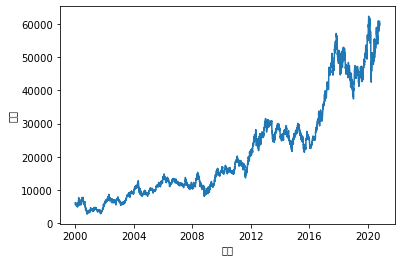

In [21]:
# 그래프
sns.lineplot(x=df_price['일자'], y=df_price['종가'],data=df_price)

In [22]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
col = ['시가', '고가', '저가', '종가', '거래량']

In [25]:
df_scaler = scaler.fit_transform(df_price[col])

In [26]:
df_scaler

array([[0.05819038, 0.05579614, 0.05465587, 0.05664488, 0.45181622],
       [0.05482677, 0.05496336, 0.0522942 , 0.04776269, 0.45476966],
       [0.05398587, 0.0502998 , 0.05330634, 0.04843305, 0.33121213],
       ...,
       [0.97813656, 0.96668887, 0.96626181, 0.95977878, 0.10812795],
       [0.96636394, 0.96002665, 0.95445344, 0.95139936, 0.10080803],
       [0.95963673, 0.95669554, 0.9645749 , 0.96145467, 0.00694478]])

In [27]:
df_scaler.shape

(5218, 5)

In [28]:
pd.DataFrame(df_scaler, columns=col)

,시가,고가,저가,종가,거래량
0,0.058190,0.055796,0.054656,0.056645,0.451816
1,0.054827,0.054963,0.052294,0.047763,0.454770
2,0.053986,0.050300,0.053306,0.048433,0.331212
3,0.050790,0.048468,0.049595,0.047092,0.245440
4,0.051463,0.050133,0.053306,0.050947,0.285479
...,...,...,...,...,...
5213,0.983182,0.976682,0.978070,0.974862,0.117210
5214,0.983182,0.971686,0.979757,0.974862,0.097961
5215,0.978137,0.966689,0.966262,0.959779,0.108128
5216,0.966364,0.960027,0.954453,0.951399,0.100808


In [29]:
mms_df = pd.DataFrame(df_scaler, columns=col)

In [30]:
mms_df

,시가,고가,저가,종가,거래량
0,0.058190,0.055796,0.054656,0.056645,0.451816
1,0.054827,0.054963,0.052294,0.047763,0.454770
2,0.053986,0.050300,0.053306,0.048433,0.331212
3,0.050790,0.048468,0.049595,0.047092,0.245440
4,0.051463,0.050133,0.053306,0.050947,0.285479
...,...,...,...,...,...
5213,0.983182,0.976682,0.978070,0.974862,0.117210
5214,0.983182,0.971686,0.979757,0.974862,0.097961
5215,0.978137,0.966689,0.966262,0.959779,0.108128
5216,0.966364,0.960027,0.954453,0.951399,0.100808


In [31]:
mms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      5218 non-null   float64
 1   고가      5218 non-null   float64
 2   저가      5218 non-null   float64
 3   종가      5218 non-null   float64
 4   거래량     5218 non-null   float64
dtypes: float64(5)
memory usage: 204.0 KB


In [32]:
df_rest = df_price.drop(col, axis=1)

In [33]:
df_rest

,일자,연도,월,일
0,2000-01-04,2000,1,4
1,2000-01-05,2000,1,5
2,2000-01-06,2000,1,6
3,2000-01-07,2000,1,7
4,2000-01-10,2000,1,10
...,...,...,...,...
5213,2020-10-13,2020,10,13
5214,2020-10-14,2020,10,14
5215,2020-10-15,2020,10,15
5216,2020-10-16,2020,10,16


In [34]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      5218 non-null   datetime64[ns]
 1   연도      5218 non-null   int64         
 2   월       5218 non-null   int64         
 3   일       5218 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 163.2 KB


In [35]:
mms_df

,시가,고가,저가,종가,거래량
0,0.058190,0.055796,0.054656,0.056645,0.451816
1,0.054827,0.054963,0.052294,0.047763,0.454770
2,0.053986,0.050300,0.053306,0.048433,0.331212
3,0.050790,0.048468,0.049595,0.047092,0.245440
4,0.051463,0.050133,0.053306,0.050947,0.285479
...,...,...,...,...,...
5213,0.983182,0.976682,0.978070,0.974862,0.117210
5214,0.983182,0.971686,0.979757,0.974862,0.097961
5215,0.978137,0.966689,0.966262,0.959779,0.108128
5216,0.966364,0.960027,0.954453,0.951399,0.100808


In [36]:
pd.concat([df_rest,mms_df], axis=1)

,일자,연도,월,일,시가,고가,저가,종가,거래량
0,2000-01-04,2000,1,4,0.058190,0.055796,0.054656,0.056645,0.451816
1,2000-01-05,2000,1,5,0.054827,0.054963,0.052294,0.047763,0.454770
2,2000-01-06,2000,1,6,0.053986,0.050300,0.053306,0.048433,0.331212
3,2000-01-07,2000,1,7,0.050790,0.048468,0.049595,0.047092,0.245440
4,2000-01-10,2000,1,10,0.051463,0.050133,0.053306,0.050947,0.285479
...,...,...,...,...,...,...,...,...,...
5213,2020-10-13,2020,10,13,0.983182,0.976682,0.978070,0.974862,0.117210
5214,2020-10-14,2020,10,14,0.983182,0.971686,0.979757,0.974862,0.097961
5215,2020-10-15,2020,10,15,0.978137,0.966689,0.966262,0.959779,0.108128
5216,2020-10-16,2020,10,16,0.966364,0.960027,0.954453,0.951399,0.100808


In [37]:
df2 = df_rest.join(mms_df)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      5218 non-null   datetime64[ns]
 1   연도      5218 non-null   int64         
 2   월       5218 non-null   int64         
 3   일       5218 non-null   int64         
 4   시가      5218 non-null   float64       
 5   고가      5218 non-null   float64       
 6   저가      5218 non-null   float64       
 7   종가      5218 non-null   float64       
 8   거래량     5218 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 367.0 KB


In [39]:
df2.tail()

,일자,연도,월,일,시가,고가,저가,종가,거래량
5213,2020-10-13,2020,10,13,0.983182,0.976682,0.978070,0.974862,0.117210
5214,2020-10-14,2020,10,14,0.983182,0.971686,0.979757,0.974862,0.097961
5215,2020-10-15,2020,10,15,0.978137,0.966689,0.966262,0.959779,0.108128
5216,2020-10-16,2020,10,16,0.966364,0.960027,0.954453,0.951399,0.100808
5217,2020-10-19,2020,10,19,0.959637,0.956696,0.964575,0.961455,0.006945


In [40]:
df_scaled = mms_df.copy()

In [41]:
df_scaled

,시가,고가,저가,종가,거래량
0,0.058190,0.055796,0.054656,0.056645,0.451816
1,0.054827,0.054963,0.052294,0.047763,0.454770
2,0.053986,0.050300,0.053306,0.048433,0.331212
3,0.050790,0.048468,0.049595,0.047092,0.245440
4,0.051463,0.050133,0.053306,0.050947,0.285479
...,...,...,...,...,...
5213,0.983182,0.976682,0.978070,0.974862,0.117210
5214,0.983182,0.971686,0.979757,0.974862,0.097961
5215,0.978137,0.966689,0.966262,0.959779,0.108128
5216,0.966364,0.960027,0.954453,0.951399,0.100808


In [42]:
# 학습을 시킬 데이터 셋 생성

In [43]:
TEST_SIZE = 200

In [44]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [45]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [46]:
# feature 와 label 정의

In [47]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)



In [48]:
# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((3998, 20, 4), (1000, 20, 4), (3998, 1), (1000, 1))

In [49]:
# test dataset (실제 예측 해볼 데이터)
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

In [50]:
# Keras를 활용한 LSTM 모델 생성

In [51]:
##import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [52]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
250/250 [==============================] - ETA: 0s - loss: 0.0169
Epoch 00001: val_loss improved from inf to 0.00021, saving model to tmp_checkpoint.h5
250/250 [==============================] - 3s 10ms/step - loss: 0.0169 - val_loss: 2.0750e-04
Epoch 2/200
249/250 [============================>.] - ETA: 0s - loss: 1.6162e-04
Epoch 00002: val_loss improved from 0.00021 to 0.00017, saving model to tmp_checkpoint.h5
250/250 [==============================] - 2s 8ms/step - loss: 1.6143e-04 - val_loss: 1.6956e-04
Epoch 3/200
249/250 [============================>.] - ETA: 0s - loss: 1.3509e-04
Epoch 00003: val_loss improved from 0.00017 to 0.00013, saving model to tmp_checkpoint.h5
250/250 [==============================] - 2s 10ms/step - loss: 1.3512e-04 - val_loss: 1.3107e-04
Epoch 4/200
245/250 [============================>.] - ETA: 0s - loss: 1.2261e-04
Epoch 00004: val_loss improved from 0.00013 to 0.00012, saving model to tmp_checkpoint.h5
250/250 [======================

In [53]:
# weight 로딩
model.load_weights('tmp_checkpoint.h5')

In [54]:
# 예측
pred = model.predict(test_feature)

In [55]:
# 실제데이터와 예측한 데이터 시각화

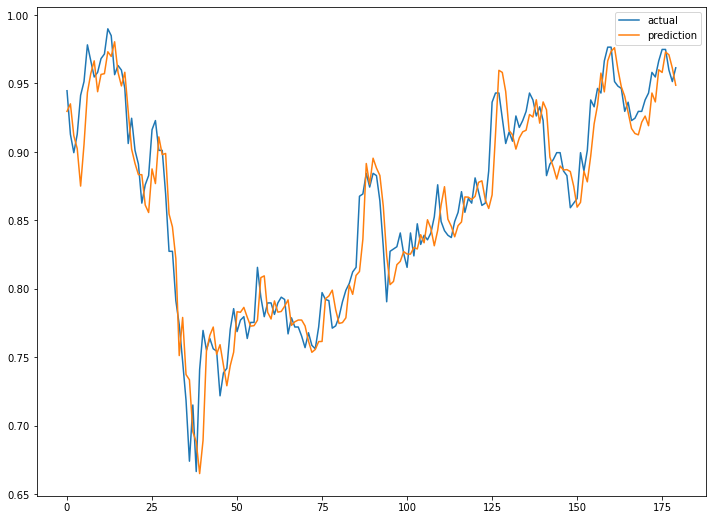

In [56]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()